# Adjusting Operating Hour Analysis


## Objectives and Questions

Our restaurant have been operating from 5pm to 11pm. Recently, we are deciding on wether if we should close earlier since we feel like there are very little peopel coming in after 10pm and it is very likely that revenue we have  By closing ealier, it could potentially reduce operational costs during the lower revenue-generating hours while not significantly impacting the overall business, as the majority of your turnover and customer traffic occurs earlier.

In [52]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel("D:/Projects/Restaurant Data Analytics/fsj/经营指标时段统计_开台时间.xls")

# Display the first few rows of the data to understand its structure
data.head(10)


,经营指标时段统计,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,店名称,冯记烧烤总部,NaN,NaN,NaN,NaN,NaN,操作人,000,NaN,NaN,NaN,NaN,NaN,NaN
1,统计时间,2023-09-01 09:00:00 至 2023-11-11 09:00:00,NaN,NaN,NaN,NaN,NaN,打印时间,2023-11-12 13:39,NaN,NaN,NaN,NaN,NaN,NaN
2,城市,全部,NaN,NaN,NaN,NaN,NaN,门店,全部,NaN,NaN,NaN,NaN,NaN,NaN
3,明细信息,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,门店,营业日,时段,营业额,优惠金额,营业收入,非收入金额,纯收金额,账单数,开台数,客流量,单均消费,桌均消费,人均消费,营业收入占比
5,org.apache.poi.hssf.usermodel.HSSFSheet@5d7415f6,2023-09-01,11:00-12:00,799,0,799,11.6,787.4,3,2,6,266.33,379,126.33,0.12%
6,org.apache.poi.hssf.usermodel.HSSFSheet@5d7415f6,2023-09-01,12:00-13:00,391.8,0,391.8,38.52,353.28,3,1,3,130.6,246,82,0.06%
7,org.apache.poi.hssf.usermodel.HSSFSheet@5d7415f6,2023-09-01,17:00-18:00,269,0,269,11,258,2,1,7,134.5,244,34.86,0.04%
8,org.apache.poi.hssf.usermodel.HSSFSheet@5d7415f6,2023-09-01,18:00-19:00,2492.4,11,2481.4,10.14,2471.26,10,9,44,249.24,272.89,55.82,0.38%
9,org.apache.poi.hssf.usermodel.HSSFSheet@5d7415f6,2023-09-01,19:00-20:00,3808,54,3754,0,3754,18,18,68,211.56,211.56,56,0.58%


brief overview of the relevant columns:

门店 (Store): The name of the Restaurant. \
营业日 (Business Day): The date of the business operations. \
时段 (Time Slot): Specific time intervals during the day. \
营业额 (Turnover): The total sales amount for the time slot.\
优惠金额 (Discount Amount): The amount of discounts given.\
营业收入 (Business Income): The income from sales.\
非收入金额 (Non-Income Amount): Possibly refers to non-sales income.\
纯收金额 (Net Income): Net income after deductions.\
账单数 (Number of Bills): The number of bills generated.\
开台数 (Number of Tables Opened): The number of tables served.\
客流量 (Customer Traffic): The number of customers.\
单均消费 (Average Consumption per Bill): Average spending per bill. \
桌均消费 (Average Consumption per Table): Average spending per table. \
人均消费 (Average Consumption per Person): Average spending per person.\
营业收入占比 (Business Income Percentage): The percentage of total income for that time slot.

## Data Cleaning & Preparation

In [53]:
# Correcting the column names based on the new inspection
columns_to_select= {
    'Unnamed: 1': 'Business_Day',
    'Unnamed: 2': 'Time_Slot',
    'Unnamed: 3': 'Revenue',
    'Unnamed: 4': 'Discount_Amount',
    'Unnamed: 5': 'Operating_Income',
    'Unnamed: 8': 'Bill_Count',
    'Unnamed: 9': 'Table_Count',
    'Unnamed: 10': 'Customer_Flow',
    'Unnamed: 11': 'Average_Spending_Per_Bill',
    'Unnamed: 12': 'Average_Spending_Per_Table',
    'Unnamed: 13': 'Average_Spending_Per_Person',
    'Unnamed: 14': 'Revenue_Percentage'
}

# Remove the first 5 rows
data = data.iloc[5:].reset_index(drop=True)

# Re-process the data with correct column names and dropping store column
data = data[columns_to_select.keys()].rename(columns=columns_to_select)


# Displaying the first few rows of the correctly processed data
data.head()


,Business_Day,Time_Slot,Revenue,Discount_Amount,Operating_Income,Bill_Count,Table_Count,Customer_Flow,Average_Spending_Per_Bill,Average_Spending_Per_Table,Average_Spending_Per_Person,Revenue_Percentage
0,2023-09-01,11:00-12:00,799,0,799,3,2,6,266.33,379,126.33,0.12%
1,2023-09-01,12:00-13:00,391.8,0,391.8,3,1,3,130.6,246,82,0.06%
2,2023-09-01,17:00-18:00,269,0,269,2,1,7,134.5,244,34.86,0.04%
3,2023-09-01,18:00-19:00,2492.4,11,2481.4,10,9,44,249.24,272.89,55.82,0.38%
4,2023-09-01,19:00-20:00,3808,54,3754,18,18,68,211.56,211.56,56,0.58%


### Checking for and handling missing or null values, and data type for each columns.

In [54]:
# Check for missing or null values in the dataset
missing_values = data.isnull().sum()
missing_values

Business_Day                   1
Time_Slot                      0
Revenue                        0
Discount_Amount                0
Operating_Income               0
Bill_Count                     0
Table_Count                    0
Customer_Flow                  0
Average_Spending_Per_Bill      1
Average_Spending_Per_Table     1
Average_Spending_Per_Person    1
Revenue_Percentage             1
dtype: int64

Since there is some missing values, I did a visual inspection and realized that the last row of the dataset is a summary row which causes the missing values.

In [55]:

# Remove the last row as it is the total which might cause 
data = data.iloc[:-1]

# Recheck for missing or null values in the dataset after removing the summary row
missing_values_updated = data.isnull().sum()
missing_values_updated

Business_Day                   0
Time_Slot                      0
Revenue                        0
Discount_Amount                0
Operating_Income               0
Bill_Count                     0
Table_Count                    0
Customer_Flow                  0
Average_Spending_Per_Bill      0
Average_Spending_Per_Table     0
Average_Spending_Per_Person    0
Revenue_Percentage             0
dtype: int64

There is no missing values in the dataset. Since all the data types are object, we proceed with checking and handling the data type for each columns.

In [56]:
# Check the data types of each column
data_types = data.dtypes
data_types


Business_Day                   object
Time_Slot                      object
Revenue                        object
Discount_Amount                object
Operating_Income               object
Bill_Count                     object
Table_Count                    object
Customer_Flow                  object
Average_Spending_Per_Bill      object
Average_Spending_Per_Table     object
Average_Spending_Per_Person    object
Revenue_Percentage             object
dtype: object

Since they are all objects, we should convert them into appropriate types in order to proceed with the analytics.

In [57]:
# Convert '营业日 (Business Day)' to datetime format
data['Business_Day'] = pd.to_datetime(data['Business_Day'])

# Converting Revenue Percentage into float
data['Revenue_Percentage'] = data['Revenue_Percentage'].str.rstrip('%').astype('float') / 100

# Converting relevant columns to numeric for analysis
numeric_columns_corrected = ['Revenue', 'Discount_Amount', 'Operating_Income', 'Bill_Count', 'Table_Count', 'Customer_Flow', 'Average_Spending_Per_Bill', 'Average_Spending_Per_Table', 'Average_Spending_Per_Person', 'Revenue_Percentage']
data[numeric_columns_corrected] = data[numeric_columns_corrected].apply(pd.to_numeric, errors='coerce')

# Recheck for missing or null values in the dataset after removing the summary row
data_types_updated =data.dtypes
data_types_updated

Business_Day                   datetime64[ns]
Time_Slot                              object
Revenue                               float64
Discount_Amount                       float64
Operating_Income                      float64
Bill_Count                              int64
Table_Count                             int64
Customer_Flow                           int64
Average_Spending_Per_Bill             float64
Average_Spending_Per_Table            float64
Average_Spending_Per_Person           float64
Revenue_Percentage                    float64
dtype: object

In [58]:
# Statistical summary of the numerical columns to identify any outliers
numerical_summary = data.describe()
numerical_summary

,Business_Day,Revenue,Discount_Amount,Operating_Income,Bill_Count,Table_Count,Customer_Flow,Average_Spending_Per_Bill,Average_Spending_Per_Table,Average_Spending_Per_Person,Revenue_Percentage
count,605,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,2023-10-05 10:45:01.487603200,1084.614777,5.783868,1078.830909,5.980165,4.343802,17.839669,152.686975,179.799917,48.857438,0.001654
min,2023-09-01 00:00:00,3.000000,0.000000,3.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,2023-09-18 00:00:00,219.000000,0.000000,219.000000,2.000000,1.000000,4.000000,88.370000,104.000000,34.400000,0.000300
50%,2023-10-05 00:00:00,596.800000,0.000000,596.800000,4.000000,3.000000,9.000000,140.000000,174.670000,51.230000,0.000900
75%,2023-10-23 00:00:00,1292.000000,4.000000,1289.000000,8.000000,6.000000,22.000000,198.750000,242.670000,63.500000,0.002000
max,2023-11-10 00:00:00,11453.200000,94.000000,11395.200000,35.000000,32.000000,176.000000,1080.000000,1080.000000,427.000000,0.017500
std,NaN,1431.008254,13.252670,1423.562547,5.483534,4.845030,23.741623,96.401734,125.280659,32.910726,0.002181


## Data Exploration

In [59]:
import pandas as pd

# Assuming 'processed_data_corrected' is your cleaned and processed dataset
# Grouping data by time slot and aggregating key metrics
grouped_data = data.groupby('Time_Slot').agg({
    'Revenue': 'sum',
    'Operating_Income': 'sum',
    'Bill_Count': 'sum',
    'Table_Count': 'sum',
    'Customer_Flow': 'sum',
    'Average_Spending_Per_Bill': 'mean',
    'Average_Spending_Per_Table': 'mean',
    'Average_Spending_Per_Person': 'mean',
    'Revenue_Percentage': 'sum'
}).reset_index()

# Sorting the data by revenue to identify the most profitable time slots
grouped_data_sorted_by_revenue = grouped_data.sort_values('Revenue', ascending=False)

# Displaying the sorted data
print(grouped_data_sorted_by_revenue.head())


     Time_Slot    Revenue  Operating_Income  Bill_Count  Table_Count  \
8  18:00-19:00  238592.86          237177.9        1040          843   
9  19:00-20:00  112996.70          112034.5         614          498   
2  12:00-13:00   92341.80           92122.6         488          379   
1  11:00-12:00   66676.58           66575.3         411          233   
7  17:00-18:00   55419.50           55237.5         339          210   

   Customer_Flow  Average_Spending_Per_Bill  Average_Spending_Per_Table  \
8           3772                 219.421831                  259.609155   
9           1901                 177.412817                  206.945070   
2           1604                 173.869577                  207.385070   
1            943                 145.620141                  204.274085   
7            803                 150.536812                  196.089710   

   Average_Spending_Per_Person  Revenue_Percentage  
8                    61.382113              0.3636  
9         

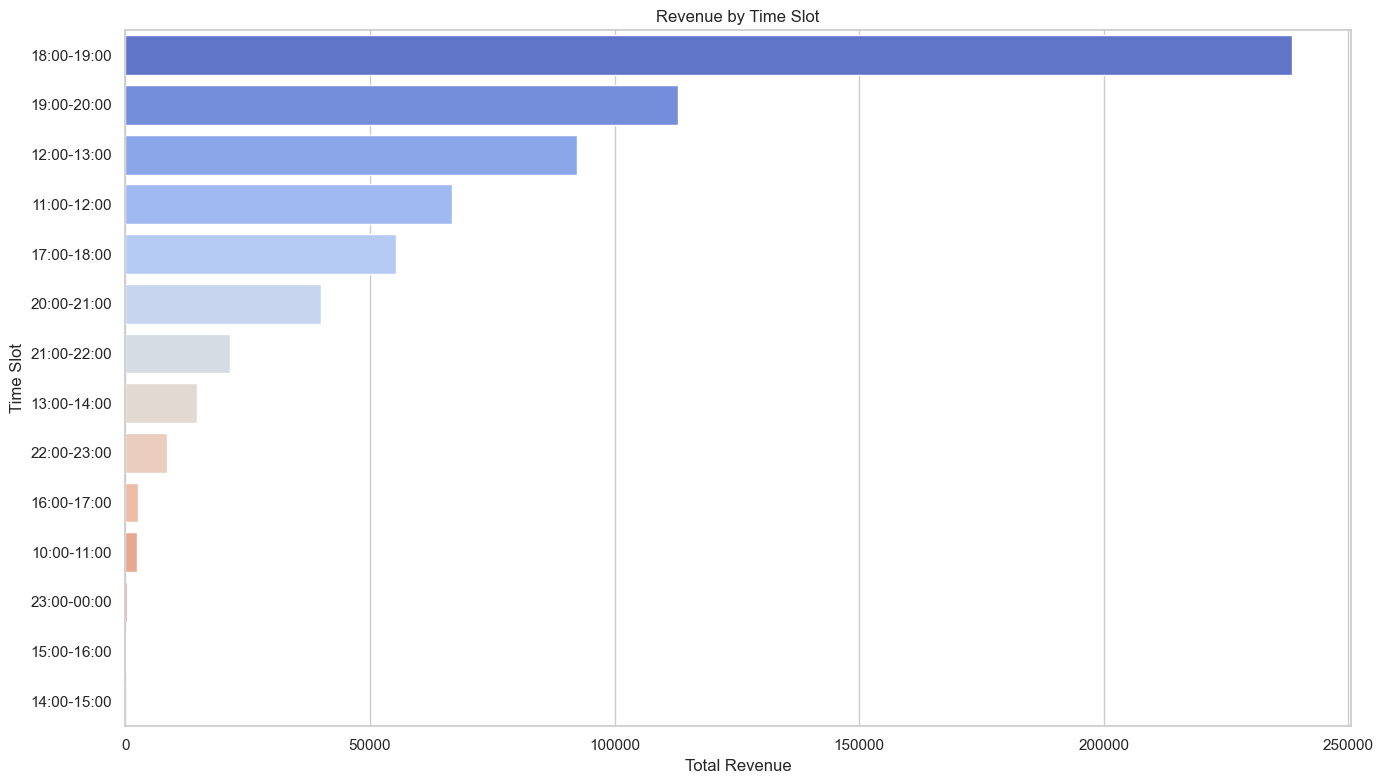

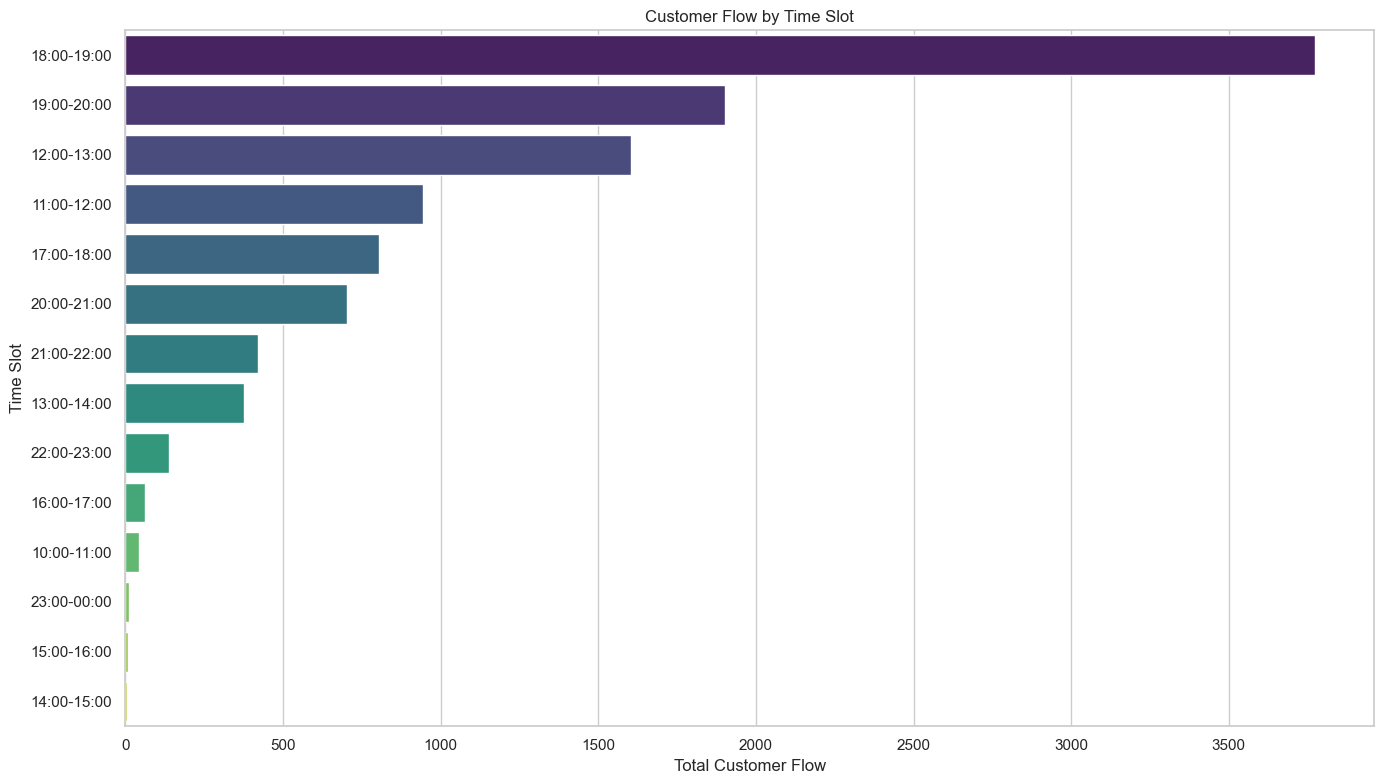

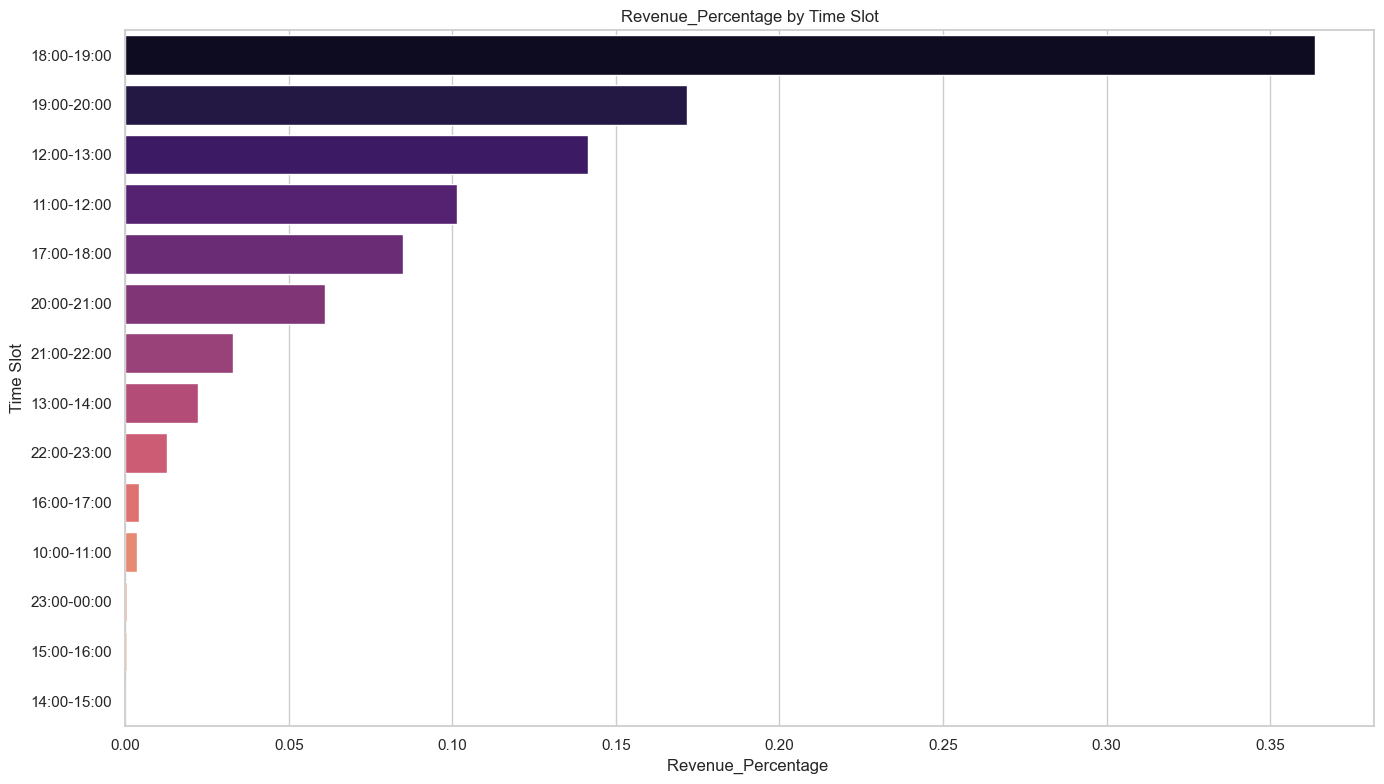

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Excluding the '合计' (total) row for detailed time slot analysis
detailed_grouped_data = grouped_data_sorted_by_revenue[~grouped_data_sorted_by_revenue['Time_Slot'].str.contains('合计')]

# Plotting Revenue by Time Slot
plt.figure(figsize=(14, 8)) 
sns.barplot(x='Revenue', y='Time_Slot', data=detailed_grouped_data, palette="coolwarm")
plt.title('Revenue by Time Slot')
plt.xlabel('Total Revenue')
plt.ylabel('Time Slot')
plt.tight_layout()

# Plotting Customer Flow by Time Slot
plt.figure(figsize=(14, 8))
sns.barplot(x='Customer_Flow', y='Time_Slot', data=detailed_grouped_data, palette="viridis")
plt.title('Customer Flow by Time Slot')
plt.xlabel('Total Customer Flow')
plt.ylabel('Time Slot')
plt.tight_layout()

# Plotting Average Spending Per Person by Time Slot
plt.figure(figsize=(14, 8))
sns.barplot(x='Revenue_Percentage', y='Time_Slot', data=detailed_grouped_data, palette="magma")
plt.title('Revenue_Percentage by Time Slot')
plt.xlabel('Revenue_Percentage ')
plt.ylabel('Time Slot')
plt.tight_layout()

plt.show()


In [61]:
# Calculating daily total revenue for each day
daily_total_revenue = data.groupby('Business_Day')['Revenue'].sum()

# Merging daily total revenue with the original dataset to calculate the percentage of each time slot
data_with_daily_total = data.merge(daily_total_revenue.rename('Daily Total Revenue'), on='Business_Day')

# Calculating the revenue percentage of each time slot over the daily total revenue
data_with_daily_total['Time Slot Revenue %'] = (data_with_daily_total['Revenue'] / data_with_daily_total['Daily Total Revenue']) * 100

# Grouping by month and hour to see the trend in the percentage of revenue for each time slot
monthly_hourly_revenue_percentage = data_with_daily_total.groupby([data_with_daily_total['Business_Day'].dt.month, 'Hour'])['Time Slot Revenue %'].mean().unstack()

# Displaying the revenue percentage for each month and hour
monthly_hourly_revenue_percentage


KeyError: 'Hour'

In [ ]:
# SARIMAX forecast with explicit period definition

# Assuming a weekly seasonality (7 days) for the restaurant data
seasonal_period = 7

forecasts_sarimax = {}

for time_slot in ['22:00', '23:00']:
    ts = grouped_after_10pm_filled[time_slot]
    ts.index = pd.DatetimeIndex(ts.index.values, freq='D')  # Setting daily frequency

    # SARIMAX model
    model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_period))
    results = model.fit(disp=False)

    # Forecasting
    forecast = results.get_forecast(steps=30)
    forecast_index = pd.date_range(ts.index[-1], periods=31, closed='right')
    forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
    forecasts_sarimax[time_slot] = forecast_series

# Combining forecasts into a single dataframe
forecast_sarimax_df = pd.DataFrame(forecasts_sarimax)

# Plotting the forecasts
plt.figure(figsize=(15, 8))
for time_slot in forecast_sarimax_df.columns:
    plt.plot(forecast_sarimax_df.index, forecast_sarimax_df[time_slot], label=time_slot)

# Adding plot title and labels
plt.title('30-Day SARIMAX Forecast of Revenue Percentage for 10 PM and 11 PM Time Slots')
plt.xlabel('Date')
plt.ylabel('Revenue Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Time Slots')

# Showing the plot
plt.show()


In [ ]:
# Convert '营业日' to datetime and extract hour from '时段'
data['营业日'] = pd.to_datetime(data['营业日'])
data['Hour'] = data['时段'].str.split('-').str[0]

# Calculating daily total revenue for each day
daily_total_revenue = data.groupby('营业日')['营业收入'].sum()

# Merging daily total revenue with the original dataset
data_with_daily_total = data.merge(daily_total_revenue.rename('Daily Total Revenue'), on='营业日')

# Calculating the revenue percentage of each time slot over the daily total revenue
data_with_daily_total['Time Slot Revenue %'] = (data_with_daily_total['营业收入'] / data_with_daily_total['Daily Total Revenue']) * 100

# Selecting data for 10 PM and 11 PM time slots
after_10pm_data = data_with_daily_total[data_with_daily_total['Hour'].isin(['22:00', '23:00'])]

# Grouping the data by date and hour
grouped_after_10pm = after_10pm_data.groupby(['营业日', 'Hour'])['Time Slot Revenue %'].mean().unstack()

# Filling missing values with 0 (assuming no revenue in missing time slots)
grouped_after_10pm_filled = grouped_after_10pm.fillna(0)

# Reindexing the time series to ensure a daily frequency
idx = pd.date_range(start=grouped_after_10pm_filled.index.min(), end=grouped_after_10pm_filled.index.max(), freq='D')
grouped_after_10pm_reindexed = grouped_after_10pm_filled.reindex(idx, fill_value=0)

# Forecasting using SARIMAX
forecasts_sarimax = {}
seasonal_period = 7  # Assuming a weekly seasonality

for time_slot in ['22:00', '23:00']:
    ts = grouped_after_10pm_reindexed[time_slot]
    model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_period))
    results = model.fit(disp=False)

    # Forecasting
    forecast = results.get_forecast(steps=30)
    last_date = ts.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
    forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
    forecasts_sarimax[time_slot] = forecast_series

# Combining forecasts into a single dataframe
forecast_sarimax_df = pd.DataFrame(forecasts_sarimax)

# Plotting the forecasts
plt.figure(figsize=(15, 8))
for time_slot in forecast_sarimax_df.columns:
    plt.plot(forecast_sarimax_df.index, forecast_sarimax_df[time_slot], label=time_slot)

# Adding plot title and labels
plt.title('30-Day SARIMAX Forecast of Revenue Percentage for 10 PM and 11 PM Time Slots')
plt.xlabel('Date')
plt.ylabel('Revenue Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Time Slots')

# Showing the plot
plt.show()
